## Visualizing The Gender Gap In College Degrees

### Introduction

In this project we are going to visualize the gender gap across several college degrees using a dataset from [The Department of Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp). This department releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. The dataset can be downloaded compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

### First Graph: Visualizing gender gap on STEM degrees

In a first step, we will focus on the STEM degrees. For this purpose, we are going to order the resulting graphs by margin value of the existing gap nowdays.

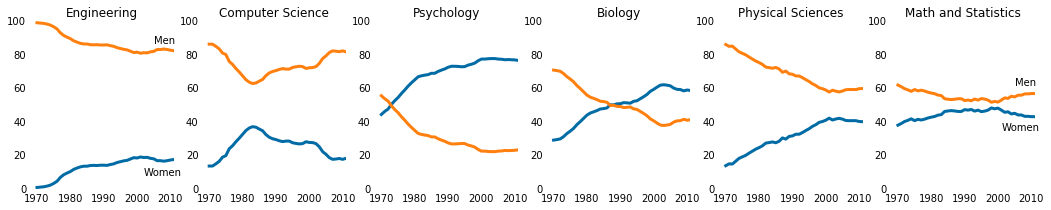

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0, 6):
    ax = fig.add_subplot(1, 6, sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], color=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], color=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

### Second Graph: Visualizing all degrees categories

For this part, and because there are seventeen degrees that we need to generate line charts for, we will use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and others (one main category for each column). For this case all three of these lists are ordered in descending order by the percentage of degrees awarded to women.

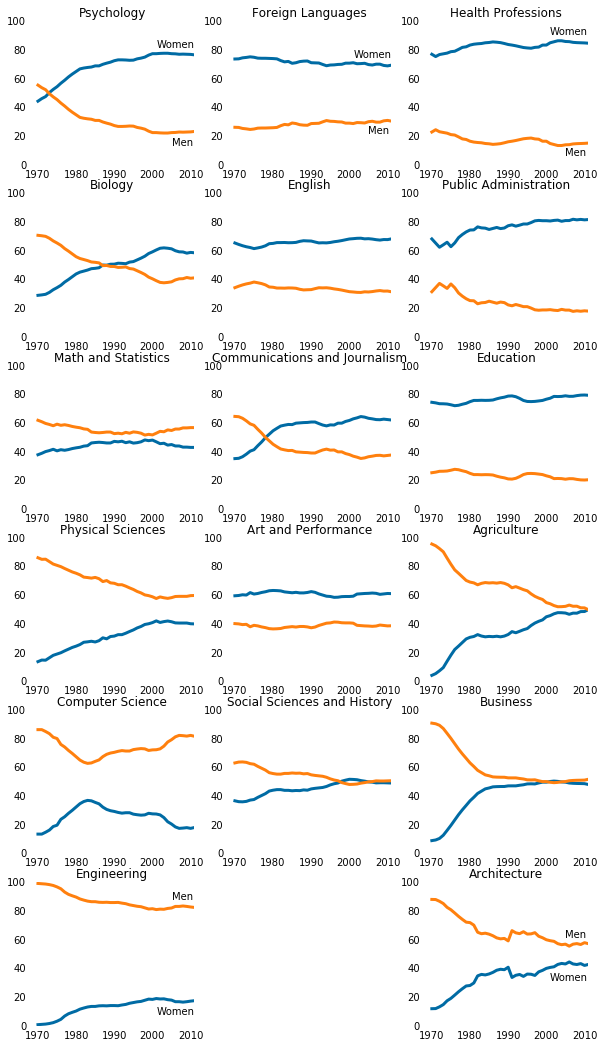

In [19]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize=(10, 18))

for sp in range(0, 6):
    ax = fig.add_subplot(6, 3, (sp*3)+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], color=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], color=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2001, 82, 'Women')
        ax.text(2005, 14, 'Men')
    elif sp == 5:
        ax.text(2005, 88, 'Men')
        ax.text(2001, 8, 'Women')
        
for sp in range(0, 5):
    ax = fig.add_subplot(6, 3, (sp*3)+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], color=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], color=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2001, 75, 'Women')
        ax.text(2005, 22, 'Men')

for sp in range(0, 6):
    ax = fig.add_subplot(6, 3, (sp*3)+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], color=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], color=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2001, 91, 'Women')
        ax.text(2005, 7, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 32, 'Women')
        
plt.show()

### Third Graph: Modifications on the previous graph to improve visualization

In order to clarify the view, we are going to keep only the x-label for the bottommost line chart of each column. The trade-off we made is that it will be now more difficult for the viewer to discern approximately which years some interesting changes in trends may have happened. This is acceptable because we are primarily interested in enabling the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how that has changed over time.

In the vein of reducing cluttering, let's also simplify the y-axis labels. Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis labels to begin with.

This last modification make it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label 50 would have been. This will be our last improvement over the figure.

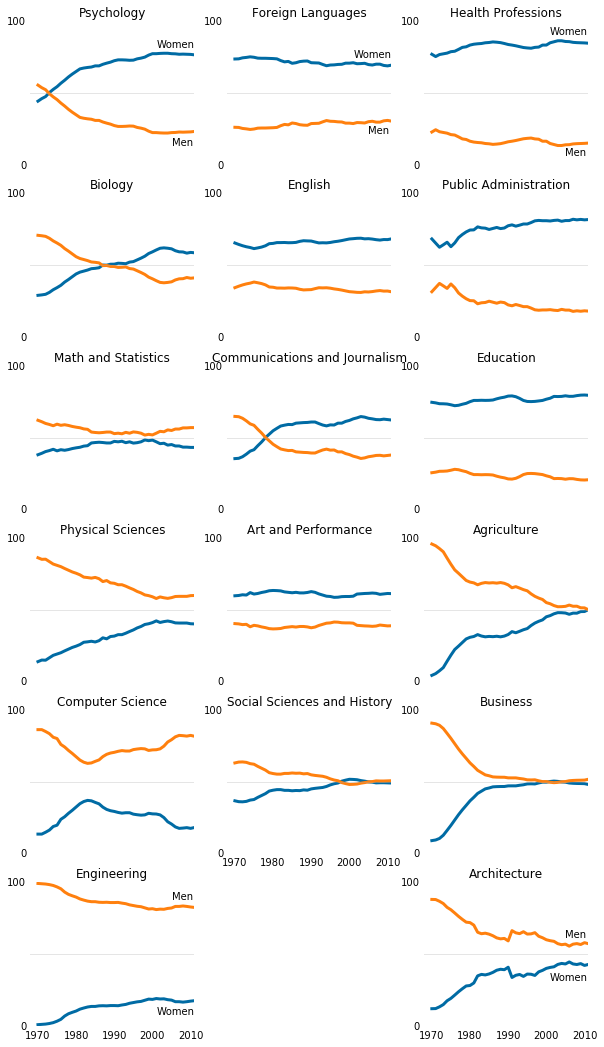

In [23]:
cb_light_grey = (171/255, 171/255, 171/255)

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize=(10, 18))

for sp in range(0, 6):
    ax = fig.add_subplot(6, 3, (sp*3)+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], color=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], color=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
    ax.set_yticks([0,100])
    ax.axhline(50, color=cb_light_grey, alpha=0.3)
    
    if sp == 0:
        ax.text(2001, 82, 'Women')
        ax.text(2005, 14, 'Men')
    elif sp == 5:
        ax.text(2005, 88, 'Men')
        ax.text(2001, 8, 'Women')
        ax.tick_params(labelbottom='on')
        
for sp in range(0, 5):
    ax = fig.add_subplot(6, 3, (sp*3)+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], color=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], color=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
    ax.set_yticks([0,100])
    ax.axhline(50, color=cb_light_grey, alpha=0.3)
    
    if sp == 0:
        ax.text(2001, 75, 'Women')
        ax.text(2005, 22, 'Men')
    if sp == 4:
        ax.tick_params(labelbottom='on')

for sp in range(0, 6):
    ax = fig.add_subplot(6, 3, (sp*3)+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], color=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], color=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
    ax.set_yticks([0,100])
    ax.axhline(50, color=cb_light_grey, alpha=0.3)
    
    if sp == 0:
        ax.text(2001, 91, 'Women')
        ax.text(2005, 7, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 32, 'Women')
        ax.tick_params(labelbottom='on')
        
plt.show()

### Last step: Recovering output

matplotlib can be used many different ways. It can be used within a Jupyter Notebook interface (like this one), from the command line, or in an integrated development environment. Many of these ways of using matplotlib vary in workflow and handle the rendering of images differently as well. To help support these different use cases, matplotlib can target different outputs or backends. If you import matplotlib and run `matplotlib.get_backend()`, you'll see the specific backend you're currently using.

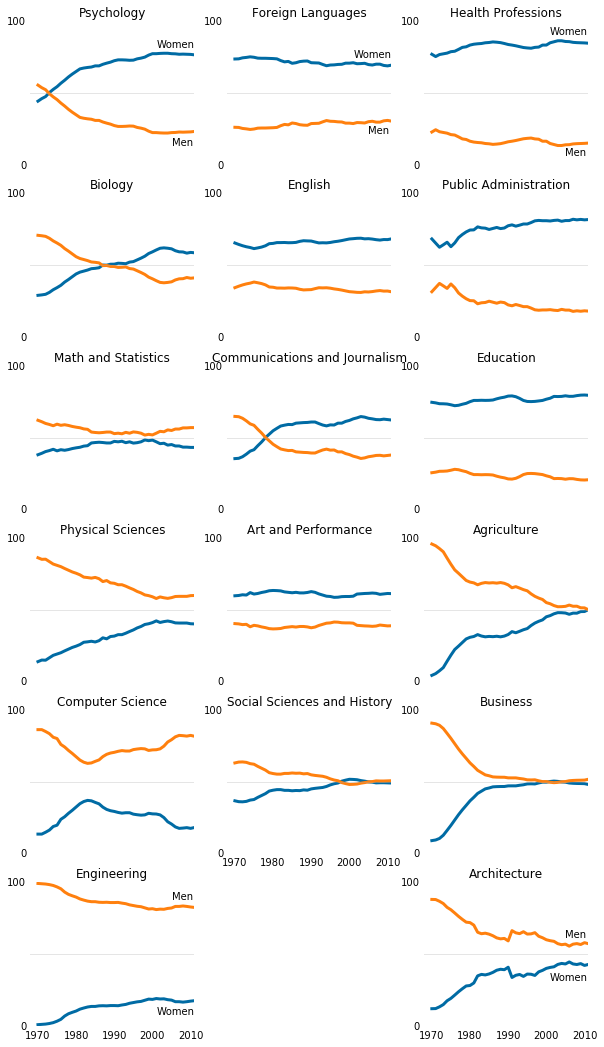

In [24]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize=(10, 18))

for sp in range(0, 6):
    ax = fig.add_subplot(6, 3, (sp*3)+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], color=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], color=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
    ax.set_yticks([0,100])
    ax.axhline(50, color=cb_light_grey, alpha=0.3)
    
    if sp == 0:
        ax.text(2001, 82, 'Women')
        ax.text(2005, 14, 'Men')
    elif sp == 5:
        ax.text(2005, 88, 'Men')
        ax.text(2001, 8, 'Women')
        ax.tick_params(labelbottom='on')
        
for sp in range(0, 5):
    ax = fig.add_subplot(6, 3, (sp*3)+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], color=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], color=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
    ax.set_yticks([0,100])
    ax.axhline(50, color=cb_light_grey, alpha=0.3)
    
    if sp == 0:
        ax.text(2001, 75, 'Women')
        ax.text(2005, 22, 'Men')
    if sp == 4:
        ax.tick_params(labelbottom='on')

for sp in range(0, 6):
    ax = fig.add_subplot(6, 3, (sp*3)+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], color=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], color=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
    ax.set_yticks([0,100])
    ax.axhline(50, color=cb_light_grey, alpha=0.3)
    
    if sp == 0:
        ax.text(2001, 91, 'Women')
        ax.text(2005, 7, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 32, 'Women')
        ax.tick_params(labelbottom='on')

# Export file before calling plt.show()
plt.savefig('gender_degrees.png')